In [1]:
import math
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import v2
%matplotlib inline
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import models
import utils


In [2]:
def make_dataloader(path, shuffle):
    tensors = torch.load(path, map_location=utils.get_device())
    dataset = TensorDataset(
        tensors["images"],
        tensors["input_seqs"],
        tensors["output_seqs"],
    )
    return DataLoader(
        dataset, batch_size=1024, shuffle=shuffle
    )

In [3]:
train_dataloader=make_dataloader("data/composite_train.pt", shuffle=False)
train_images, train_input_seqs, train_output_seqs = next(iter(train_dataloader))
val_dataloader=make_dataloader("data/composite_val.pt", shuffle=False)
val_images, val_input_seqs, val_output_seqs = next(iter(val_dataloader))
test_dataloader=make_dataloader("data/composite_test.pt", shuffle=False)
test_images, test_input_seqs, test_output_seqs = next(iter(test_dataloader))
val_input_seqs.shape

torch.Size([1024, 5])

In [5]:
test_input_seqs[5]

tensor([10,  5,  0, 12, 12], device='mps:0')

In [7]:
test_output_seqs[5]

tensor([ 5,  0,  8, 11, 12], device='mps:0')

In [8]:
test_images[0][0].shape

torch.Size([56, 56])

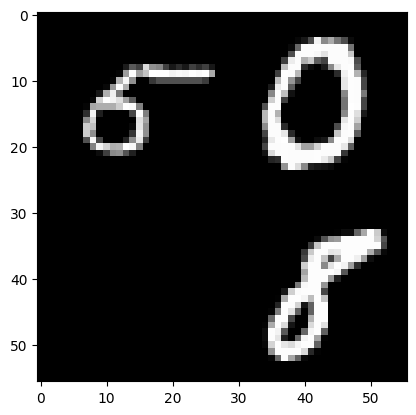

In [4]:
plt.imshow(test_images[5][0].cpu(), cmap="gray")
plt.show()

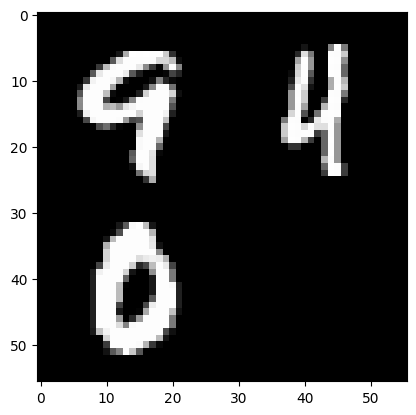

In [9]:
plt.imshow(val_images[5][0].cpu(), cmap="gray")
plt.show()

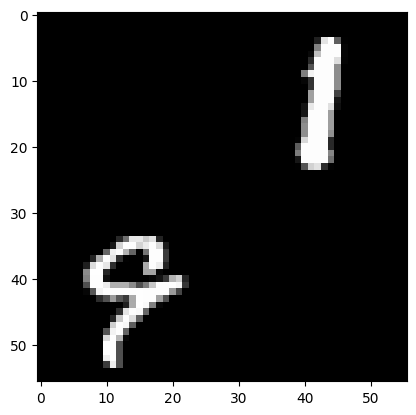

In [10]:
plt.imshow(train_images[5][0].cpu(), cmap="gray")
plt.show()

In [18]:
checkpoint = torch.load("data/complex.pth", map_location="cpu")

In [22]:
config= checkpoint["config"]
config

{'batch_size': 256,
 'learning_rate': 0.0003,
 'epochs': 20,
 'patience': 2,
 'patch_size': 14,
 'model_dim': 256,
 'ffn_dim': 1024,
 'num_coders': 6,
 'num_heads': 8,
 'seed': 42,
 'dropout': 0.1,
 'train_pe': True}

In [21]:
checkpoint["model_state_dict"]

OrderedDict([('_orig_mod.rng', tensor([0, 1, 2, 3, 4])),
             ('_orig_mod.base_transformer.cls_token',
              tensor([[[-1.5748,  0.2637,  0.1275, -0.0594, -0.9767,  1.2477, -1.0301,
                         0.1116, -0.0366,  0.0836,  0.4665, -0.4527,  0.6443, -0.0468,
                         0.3373,  0.2862,  0.5808, -0.1748, -0.4401, -1.0347, -1.1626,
                         0.1359,  0.1402, -0.9032,  2.0529,  0.0638, -0.8360, -0.0580,
                         1.5657,  1.0673, -0.4543, -0.4879, -0.1799, -1.9651,  0.6678,
                        -1.7612,  0.9962,  1.2278,  1.1469,  0.2560,  1.6961, -0.4450,
                        -1.8619,  0.7132,  0.5270, -1.3274, -0.2805, -1.9890, -0.6703,
                         0.9447, -1.1164, -0.4842, -0.8478, -0.2108, -0.5582,  0.6055,
                         0.6423, -1.3005,  2.0826, -0.2018, -0.3826,  1.4157, -0.7217,
                        -0.1140,  1.7908, -0.7077, -1.1426,  0.9152,  0.0522,  0.2778,
                   

In [23]:
import inspect
ctor_keys = inspect.signature(models.ComplexTransformer).parameters
ctor_cfg = {k: v for k, v in config.items() if k in ctor_keys}
ctor_cfg

{'patch_size': 14,
 'model_dim': 256,
 'ffn_dim': 1024,
 'num_coders': 6,
 'num_heads': 8,
 'dropout': 0.1,
 'train_pe': True}

In [24]:
model = models.ComplexTransformer(**ctor_cfg)

In [25]:
model.load_state_dict(checkpoint["model_state_dict"])

RuntimeError: Error(s) in loading state_dict for ComplexTransformer:
	Missing key(s) in state_dict: "rng", "base_transformer.cls_token", "base_transformer.patchify.proj.weight", "base_transformer.patchify.norm.weight", "base_transformer.patchify.norm.bias", "base_transformer.pe.pe", "base_transformer.encoder_series.0.mha.wqkv.weight", "base_transformer.encoder_series.0.mha.endmulti.weight", "base_transformer.encoder_series.0.norm1.weight", "base_transformer.encoder_series.0.norm1.bias", "base_transformer.encoder_series.0.ffn.sequence.0.weight", "base_transformer.encoder_series.0.ffn.sequence.0.bias", "base_transformer.encoder_series.0.ffn.sequence.3.weight", "base_transformer.encoder_series.0.ffn.sequence.3.bias", "base_transformer.encoder_series.0.norm2.weight", "base_transformer.encoder_series.0.norm2.bias", "base_transformer.encoder_series.1.mha.wqkv.weight", "base_transformer.encoder_series.1.mha.endmulti.weight", "base_transformer.encoder_series.1.norm1.weight", "base_transformer.encoder_series.1.norm1.bias", "base_transformer.encoder_series.1.ffn.sequence.0.weight", "base_transformer.encoder_series.1.ffn.sequence.0.bias", "base_transformer.encoder_series.1.ffn.sequence.3.weight", "base_transformer.encoder_series.1.ffn.sequence.3.bias", "base_transformer.encoder_series.1.norm2.weight", "base_transformer.encoder_series.1.norm2.bias", "base_transformer.encoder_series.2.mha.wqkv.weight", "base_transformer.encoder_series.2.mha.endmulti.weight", "base_transformer.encoder_series.2.norm1.weight", "base_transformer.encoder_series.2.norm1.bias", "base_transformer.encoder_series.2.ffn.sequence.0.weight", "base_transformer.encoder_series.2.ffn.sequence.0.bias", "base_transformer.encoder_series.2.ffn.sequence.3.weight", "base_transformer.encoder_series.2.ffn.sequence.3.bias", "base_transformer.encoder_series.2.norm2.weight", "base_transformer.encoder_series.2.norm2.bias", "base_transformer.encoder_series.3.mha.wqkv.weight", "base_transformer.encoder_series.3.mha.endmulti.weight", "base_transformer.encoder_series.3.norm1.weight", "base_transformer.encoder_series.3.norm1.bias", "base_transformer.encoder_series.3.ffn.sequence.0.weight", "base_transformer.encoder_series.3.ffn.sequence.0.bias", "base_transformer.encoder_series.3.ffn.sequence.3.weight", "base_transformer.encoder_series.3.ffn.sequence.3.bias", "base_transformer.encoder_series.3.norm2.weight", "base_transformer.encoder_series.3.norm2.bias", "base_transformer.encoder_series.4.mha.wqkv.weight", "base_transformer.encoder_series.4.mha.endmulti.weight", "base_transformer.encoder_series.4.norm1.weight", "base_transformer.encoder_series.4.norm1.bias", "base_transformer.encoder_series.4.ffn.sequence.0.weight", "base_transformer.encoder_series.4.ffn.sequence.0.bias", "base_transformer.encoder_series.4.ffn.sequence.3.weight", "base_transformer.encoder_series.4.ffn.sequence.3.bias", "base_transformer.encoder_series.4.norm2.weight", "base_transformer.encoder_series.4.norm2.bias", "base_transformer.encoder_series.5.mha.wqkv.weight", "base_transformer.encoder_series.5.mha.endmulti.weight", "base_transformer.encoder_series.5.norm1.weight", "base_transformer.encoder_series.5.norm1.bias", "base_transformer.encoder_series.5.ffn.sequence.0.weight", "base_transformer.encoder_series.5.ffn.sequence.0.bias", "base_transformer.encoder_series.5.ffn.sequence.3.weight", "base_transformer.encoder_series.5.ffn.sequence.3.bias", "base_transformer.encoder_series.5.norm2.weight", "base_transformer.encoder_series.5.norm2.bias", "embedding.weight", "pe.weight", "decoder_series.0.masked_self_mha.wqkv.weight", "decoder_series.0.masked_self_mha.endmulti.weight", "decoder_series.0.norm1.weight", "decoder_series.0.norm1.bias", "decoder_series.0.cross_mha.wq.weight", "decoder_series.0.cross_mha.wk.weight", "decoder_series.0.cross_mha.wv.weight", "decoder_series.0.cross_mha.endmulti.weight", "decoder_series.0.norm2.weight", "decoder_series.0.norm2.bias", "decoder_series.0.ffn.sequence.0.weight", "decoder_series.0.ffn.sequence.0.bias", "decoder_series.0.ffn.sequence.3.weight", "decoder_series.0.ffn.sequence.3.bias", "decoder_series.0.norm3.weight", "decoder_series.0.norm3.bias", "decoder_series.1.masked_self_mha.wqkv.weight", "decoder_series.1.masked_self_mha.endmulti.weight", "decoder_series.1.norm1.weight", "decoder_series.1.norm1.bias", "decoder_series.1.cross_mha.wq.weight", "decoder_series.1.cross_mha.wk.weight", "decoder_series.1.cross_mha.wv.weight", "decoder_series.1.cross_mha.endmulti.weight", "decoder_series.1.norm2.weight", "decoder_series.1.norm2.bias", "decoder_series.1.ffn.sequence.0.weight", "decoder_series.1.ffn.sequence.0.bias", "decoder_series.1.ffn.sequence.3.weight", "decoder_series.1.ffn.sequence.3.bias", "decoder_series.1.norm3.weight", "decoder_series.1.norm3.bias", "decoder_series.2.masked_self_mha.wqkv.weight", "decoder_series.2.masked_self_mha.endmulti.weight", "decoder_series.2.norm1.weight", "decoder_series.2.norm1.bias", "decoder_series.2.cross_mha.wq.weight", "decoder_series.2.cross_mha.wk.weight", "decoder_series.2.cross_mha.wv.weight", "decoder_series.2.cross_mha.endmulti.weight", "decoder_series.2.norm2.weight", "decoder_series.2.norm2.bias", "decoder_series.2.ffn.sequence.0.weight", "decoder_series.2.ffn.sequence.0.bias", "decoder_series.2.ffn.sequence.3.weight", "decoder_series.2.ffn.sequence.3.bias", "decoder_series.2.norm3.weight", "decoder_series.2.norm3.bias", "decoder_series.3.masked_self_mha.wqkv.weight", "decoder_series.3.masked_self_mha.endmulti.weight", "decoder_series.3.norm1.weight", "decoder_series.3.norm1.bias", "decoder_series.3.cross_mha.wq.weight", "decoder_series.3.cross_mha.wk.weight", "decoder_series.3.cross_mha.wv.weight", "decoder_series.3.cross_mha.endmulti.weight", "decoder_series.3.norm2.weight", "decoder_series.3.norm2.bias", "decoder_series.3.ffn.sequence.0.weight", "decoder_series.3.ffn.sequence.0.bias", "decoder_series.3.ffn.sequence.3.weight", "decoder_series.3.ffn.sequence.3.bias", "decoder_series.3.norm3.weight", "decoder_series.3.norm3.bias", "decoder_series.4.masked_self_mha.wqkv.weight", "decoder_series.4.masked_self_mha.endmulti.weight", "decoder_series.4.norm1.weight", "decoder_series.4.norm1.bias", "decoder_series.4.cross_mha.wq.weight", "decoder_series.4.cross_mha.wk.weight", "decoder_series.4.cross_mha.wv.weight", "decoder_series.4.cross_mha.endmulti.weight", "decoder_series.4.norm2.weight", "decoder_series.4.norm2.bias", "decoder_series.4.ffn.sequence.0.weight", "decoder_series.4.ffn.sequence.0.bias", "decoder_series.4.ffn.sequence.3.weight", "decoder_series.4.ffn.sequence.3.bias", "decoder_series.4.norm3.weight", "decoder_series.4.norm3.bias", "decoder_series.5.masked_self_mha.wqkv.weight", "decoder_series.5.masked_self_mha.endmulti.weight", "decoder_series.5.norm1.weight", "decoder_series.5.norm1.bias", "decoder_series.5.cross_mha.wq.weight", "decoder_series.5.cross_mha.wk.weight", "decoder_series.5.cross_mha.wv.weight", "decoder_series.5.cross_mha.endmulti.weight", "decoder_series.5.norm2.weight", "decoder_series.5.norm2.bias", "decoder_series.5.ffn.sequence.0.weight", "decoder_series.5.ffn.sequence.0.bias", "decoder_series.5.ffn.sequence.3.weight", "decoder_series.5.ffn.sequence.3.bias", "decoder_series.5.norm3.weight", "decoder_series.5.norm3.bias", "linear.weight", "linear.bias". 
	Unexpected key(s) in state_dict: "_orig_mod.rng", "_orig_mod.base_transformer.cls_token", "_orig_mod.base_transformer.patchify.proj.weight", "_orig_mod.base_transformer.patchify.norm.weight", "_orig_mod.base_transformer.patchify.norm.bias", "_orig_mod.base_transformer.pe.pe", "_orig_mod.base_transformer.encoder_series.0.mha.wqkv.weight", "_orig_mod.base_transformer.encoder_series.0.mha.endmulti.weight", "_orig_mod.base_transformer.encoder_series.0.norm1.weight", "_orig_mod.base_transformer.encoder_series.0.norm1.bias", "_orig_mod.base_transformer.encoder_series.0.ffn.sequence.0.weight", "_orig_mod.base_transformer.encoder_series.0.ffn.sequence.0.bias", "_orig_mod.base_transformer.encoder_series.0.ffn.sequence.3.weight", "_orig_mod.base_transformer.encoder_series.0.ffn.sequence.3.bias", "_orig_mod.base_transformer.encoder_series.0.norm2.weight", "_orig_mod.base_transformer.encoder_series.0.norm2.bias", "_orig_mod.base_transformer.encoder_series.1.mha.wqkv.weight", "_orig_mod.base_transformer.encoder_series.1.mha.endmulti.weight", "_orig_mod.base_transformer.encoder_series.1.norm1.weight", "_orig_mod.base_transformer.encoder_series.1.norm1.bias", "_orig_mod.base_transformer.encoder_series.1.ffn.sequence.0.weight", "_orig_mod.base_transformer.encoder_series.1.ffn.sequence.0.bias", "_orig_mod.base_transformer.encoder_series.1.ffn.sequence.3.weight", "_orig_mod.base_transformer.encoder_series.1.ffn.sequence.3.bias", "_orig_mod.base_transformer.encoder_series.1.norm2.weight", "_orig_mod.base_transformer.encoder_series.1.norm2.bias", "_orig_mod.base_transformer.encoder_series.2.mha.wqkv.weight", "_orig_mod.base_transformer.encoder_series.2.mha.endmulti.weight", "_orig_mod.base_transformer.encoder_series.2.norm1.weight", "_orig_mod.base_transformer.encoder_series.2.norm1.bias", "_orig_mod.base_transformer.encoder_series.2.ffn.sequence.0.weight", "_orig_mod.base_transformer.encoder_series.2.ffn.sequence.0.bias", "_orig_mod.base_transformer.encoder_series.2.ffn.sequence.3.weight", "_orig_mod.base_transformer.encoder_series.2.ffn.sequence.3.bias", "_orig_mod.base_transformer.encoder_series.2.norm2.weight", "_orig_mod.base_transformer.encoder_series.2.norm2.bias", "_orig_mod.base_transformer.encoder_series.3.mha.wqkv.weight", "_orig_mod.base_transformer.encoder_series.3.mha.endmulti.weight", "_orig_mod.base_transformer.encoder_series.3.norm1.weight", "_orig_mod.base_transformer.encoder_series.3.norm1.bias", "_orig_mod.base_transformer.encoder_series.3.ffn.sequence.0.weight", "_orig_mod.base_transformer.encoder_series.3.ffn.sequence.0.bias", "_orig_mod.base_transformer.encoder_series.3.ffn.sequence.3.weight", "_orig_mod.base_transformer.encoder_series.3.ffn.sequence.3.bias", "_orig_mod.base_transformer.encoder_series.3.norm2.weight", "_orig_mod.base_transformer.encoder_series.3.norm2.bias", "_orig_mod.base_transformer.encoder_series.4.mha.wqkv.weight", "_orig_mod.base_transformer.encoder_series.4.mha.endmulti.weight", "_orig_mod.base_transformer.encoder_series.4.norm1.weight", "_orig_mod.base_transformer.encoder_series.4.norm1.bias", "_orig_mod.base_transformer.encoder_series.4.ffn.sequence.0.weight", "_orig_mod.base_transformer.encoder_series.4.ffn.sequence.0.bias", "_orig_mod.base_transformer.encoder_series.4.ffn.sequence.3.weight", "_orig_mod.base_transformer.encoder_series.4.ffn.sequence.3.bias", "_orig_mod.base_transformer.encoder_series.4.norm2.weight", "_orig_mod.base_transformer.encoder_series.4.norm2.bias", "_orig_mod.base_transformer.encoder_series.5.mha.wqkv.weight", "_orig_mod.base_transformer.encoder_series.5.mha.endmulti.weight", "_orig_mod.base_transformer.encoder_series.5.norm1.weight", "_orig_mod.base_transformer.encoder_series.5.norm1.bias", "_orig_mod.base_transformer.encoder_series.5.ffn.sequence.0.weight", "_orig_mod.base_transformer.encoder_series.5.ffn.sequence.0.bias", "_orig_mod.base_transformer.encoder_series.5.ffn.sequence.3.weight", "_orig_mod.base_transformer.encoder_series.5.ffn.sequence.3.bias", "_orig_mod.base_transformer.encoder_series.5.norm2.weight", "_orig_mod.base_transformer.encoder_series.5.norm2.bias", "_orig_mod.embedding.weight", "_orig_mod.pe.weight", "_orig_mod.decoder_series.0.masked_self_mha.wqkv.weight", "_orig_mod.decoder_series.0.masked_self_mha.endmulti.weight", "_orig_mod.decoder_series.0.norm1.weight", "_orig_mod.decoder_series.0.norm1.bias", "_orig_mod.decoder_series.0.cross_mha.wq.weight", "_orig_mod.decoder_series.0.cross_mha.wk.weight", "_orig_mod.decoder_series.0.cross_mha.wv.weight", "_orig_mod.decoder_series.0.cross_mha.endmulti.weight", "_orig_mod.decoder_series.0.norm2.weight", "_orig_mod.decoder_series.0.norm2.bias", "_orig_mod.decoder_series.0.ffn.sequence.0.weight", "_orig_mod.decoder_series.0.ffn.sequence.0.bias", "_orig_mod.decoder_series.0.ffn.sequence.3.weight", "_orig_mod.decoder_series.0.ffn.sequence.3.bias", "_orig_mod.decoder_series.0.norm3.weight", "_orig_mod.decoder_series.0.norm3.bias", "_orig_mod.decoder_series.1.masked_self_mha.wqkv.weight", "_orig_mod.decoder_series.1.masked_self_mha.endmulti.weight", "_orig_mod.decoder_series.1.norm1.weight", "_orig_mod.decoder_series.1.norm1.bias", "_orig_mod.decoder_series.1.cross_mha.wq.weight", "_orig_mod.decoder_series.1.cross_mha.wk.weight", "_orig_mod.decoder_series.1.cross_mha.wv.weight", "_orig_mod.decoder_series.1.cross_mha.endmulti.weight", "_orig_mod.decoder_series.1.norm2.weight", "_orig_mod.decoder_series.1.norm2.bias", "_orig_mod.decoder_series.1.ffn.sequence.0.weight", "_orig_mod.decoder_series.1.ffn.sequence.0.bias", "_orig_mod.decoder_series.1.ffn.sequence.3.weight", "_orig_mod.decoder_series.1.ffn.sequence.3.bias", "_orig_mod.decoder_series.1.norm3.weight", "_orig_mod.decoder_series.1.norm3.bias", "_orig_mod.decoder_series.2.masked_self_mha.wqkv.weight", "_orig_mod.decoder_series.2.masked_self_mha.endmulti.weight", "_orig_mod.decoder_series.2.norm1.weight", "_orig_mod.decoder_series.2.norm1.bias", "_orig_mod.decoder_series.2.cross_mha.wq.weight", "_orig_mod.decoder_series.2.cross_mha.wk.weight", "_orig_mod.decoder_series.2.cross_mha.wv.weight", "_orig_mod.decoder_series.2.cross_mha.endmulti.weight", "_orig_mod.decoder_series.2.norm2.weight", "_orig_mod.decoder_series.2.norm2.bias", "_orig_mod.decoder_series.2.ffn.sequence.0.weight", "_orig_mod.decoder_series.2.ffn.sequence.0.bias", "_orig_mod.decoder_series.2.ffn.sequence.3.weight", "_orig_mod.decoder_series.2.ffn.sequence.3.bias", "_orig_mod.decoder_series.2.norm3.weight", "_orig_mod.decoder_series.2.norm3.bias", "_orig_mod.decoder_series.3.masked_self_mha.wqkv.weight", "_orig_mod.decoder_series.3.masked_self_mha.endmulti.weight", "_orig_mod.decoder_series.3.norm1.weight", "_orig_mod.decoder_series.3.norm1.bias", "_orig_mod.decoder_series.3.cross_mha.wq.weight", "_orig_mod.decoder_series.3.cross_mha.wk.weight", "_orig_mod.decoder_series.3.cross_mha.wv.weight", "_orig_mod.decoder_series.3.cross_mha.endmulti.weight", "_orig_mod.decoder_series.3.norm2.weight", "_orig_mod.decoder_series.3.norm2.bias", "_orig_mod.decoder_series.3.ffn.sequence.0.weight", "_orig_mod.decoder_series.3.ffn.sequence.0.bias", "_orig_mod.decoder_series.3.ffn.sequence.3.weight", "_orig_mod.decoder_series.3.ffn.sequence.3.bias", "_orig_mod.decoder_series.3.norm3.weight", "_orig_mod.decoder_series.3.norm3.bias", "_orig_mod.decoder_series.4.masked_self_mha.wqkv.weight", "_orig_mod.decoder_series.4.masked_self_mha.endmulti.weight", "_orig_mod.decoder_series.4.norm1.weight", "_orig_mod.decoder_series.4.norm1.bias", "_orig_mod.decoder_series.4.cross_mha.wq.weight", "_orig_mod.decoder_series.4.cross_mha.wk.weight", "_orig_mod.decoder_series.4.cross_mha.wv.weight", "_orig_mod.decoder_series.4.cross_mha.endmulti.weight", "_orig_mod.decoder_series.4.norm2.weight", "_orig_mod.decoder_series.4.norm2.bias", "_orig_mod.decoder_series.4.ffn.sequence.0.weight", "_orig_mod.decoder_series.4.ffn.sequence.0.bias", "_orig_mod.decoder_series.4.ffn.sequence.3.weight", "_orig_mod.decoder_series.4.ffn.sequence.3.bias", "_orig_mod.decoder_series.4.norm3.weight", "_orig_mod.decoder_series.4.norm3.bias", "_orig_mod.decoder_series.5.masked_self_mha.wqkv.weight", "_orig_mod.decoder_series.5.masked_self_mha.endmulti.weight", "_orig_mod.decoder_series.5.norm1.weight", "_orig_mod.decoder_series.5.norm1.bias", "_orig_mod.decoder_series.5.cross_mha.wq.weight", "_orig_mod.decoder_series.5.cross_mha.wk.weight", "_orig_mod.decoder_series.5.cross_mha.wv.weight", "_orig_mod.decoder_series.5.cross_mha.endmulti.weight", "_orig_mod.decoder_series.5.norm2.weight", "_orig_mod.decoder_series.5.norm2.bias", "_orig_mod.decoder_series.5.ffn.sequence.0.weight", "_orig_mod.decoder_series.5.ffn.sequence.0.bias", "_orig_mod.decoder_series.5.ffn.sequence.3.weight", "_orig_mod.decoder_series.5.ffn.sequence.3.bias", "_orig_mod.decoder_series.5.norm3.weight", "_orig_mod.decoder_series.5.norm3.bias", "_orig_mod.linear.weight", "_orig_mod.linear.bias". 